# Comparing Bandit Agents

This notebook compares the performance of different bandit agents.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

from bart_playground.bandit.sim_util import (LinearScenario, LinearOffsetScenario, OffsetScenario, FriedmanScenario)
from compare_agents import (
    compare_agents_across_scenarios, print_summary_results, plot_comparison_results
)

In [2]:
# Create test scenarios
np.random.seed(42)
    
scenarios = {
    "Linear": LinearScenario(P=4, K=3, sigma2=1.0),
    "LinearOffset": LinearOffsetScenario(P=4, K=3, sigma2=1.0),
    "Offset": OffsetScenario(P=4, K=3, sigma2=1.0),
    # "Offset2": OffsetScenario(P=4, K=3, sigma2=0.1),
    "Friedman": FriedmanScenario(P=5, K=3, sigma2=1.0, lambda_val=5),
    "Sparse": FriedmanScenario(P=50, K=3, sigma2=1.0, lambda_val=5)
}

np.random.seed(0)

In [ ]:
# Define experiment parameters
from bart_playground.bandit.bcf_agent import BCFAgent, BCFAgentPSOff
from bart_playground.bandit.basic_agents import SillyAgent, LinearTSAgent
from bart_playground.bandit.ensemble_agent import EnsembleAgent
from bart_playground.bandit.me_agents import HierTSAgent, LinearTSAgent2, LinearUCBAgent, METSAgent


n_simulations = 32  # Number of simulations per scenario
n_draws = 500      # Number of draws per simulation

# Run the comparison
results = compare_agents_across_scenarios(
    scenarios=scenarios,
    n_simulations=n_simulations,
    n_draws=n_draws,
    agent_classes=[SillyAgent, LinearTSAgent, BCFAgent, EnsembleAgent], #, BCFAgentPSOff], # LinearUCBAgent, METSAgent, HierTSAgent],
    agent_names=["Random", "LinearTS", "MBCF-TS", "MBCF+Linear"] #, "METS", "HierTS"],
)


Evaluating Linear scenario...

Evaluating LinearOffset scenario...

Evaluating Offset scenario...

Evaluating Friedman scenario...

Evaluating Sparse scenario...


## Print Summary Results

Let's print a summary of the results for each scenario.

In [ ]:
print_summary_results(results)


=== Linear Scenario ===

Final cumulative regrets (mean ± std):
  Random: 3500.99 (±186.60)
  LinearTS: 74.78 (±29.30)
  MBCF-TS: 2177.40 (±1034.55)
  MBCF+Linear: 372.29 (±64.08)

Average computation times (seconds):
  Random: 0.0054 (±0.0021)
  LinearTS: 0.0214 (±0.0061)
  MBCF-TS: 40.8115 (±0.3234)
  MBCF+Linear: 36.0633 (±0.9996)


=== LinearOffset Scenario ===

Final cumulative regrets (mean ± std):
  Random: 1486.20 (±50.67)
  LinearTS: 1178.83 (±69.81)
  MBCF-TS: 280.90 (±113.41)
  MBCF+Linear: 910.94 (±282.61)

Average computation times (seconds):
  Random: 0.0044 (±0.0014)
  LinearTS: 0.0201 (±0.0053)
  MBCF-TS: 40.3428 (±0.2728)
  MBCF+Linear: 35.0575 (±0.2694)


=== Offset Scenario ===

Final cumulative regrets (mean ± std):
  Random: 3587.56 (±200.58)
  LinearTS: 1746.75 (±100.15)
  MBCF-TS: 332.03 (±130.87)
  MBCF+Linear: 747.93 (±485.14)

Average computation times (seconds):
  Random: 0.0044 (±0.0010)
  LinearTS: 0.0259 (±0.0069)
  MBCF-TS: 40.7879 (±1.7186)
  MBCF+Linea

## Visualize Results

Finally, let's visualize the cumulative regret for each agent across scenarios.

In [ ]:
# Create results directory if it doesn't exist
results_dir = "./results/agent_comparison17_egreedy"
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

import pickle

result_filename = os.path.join(results_dir, f"result.pkl")


In [ ]:
with open(result_filename, "wb") as file:
    pickle.dump((results, n_draws), file)


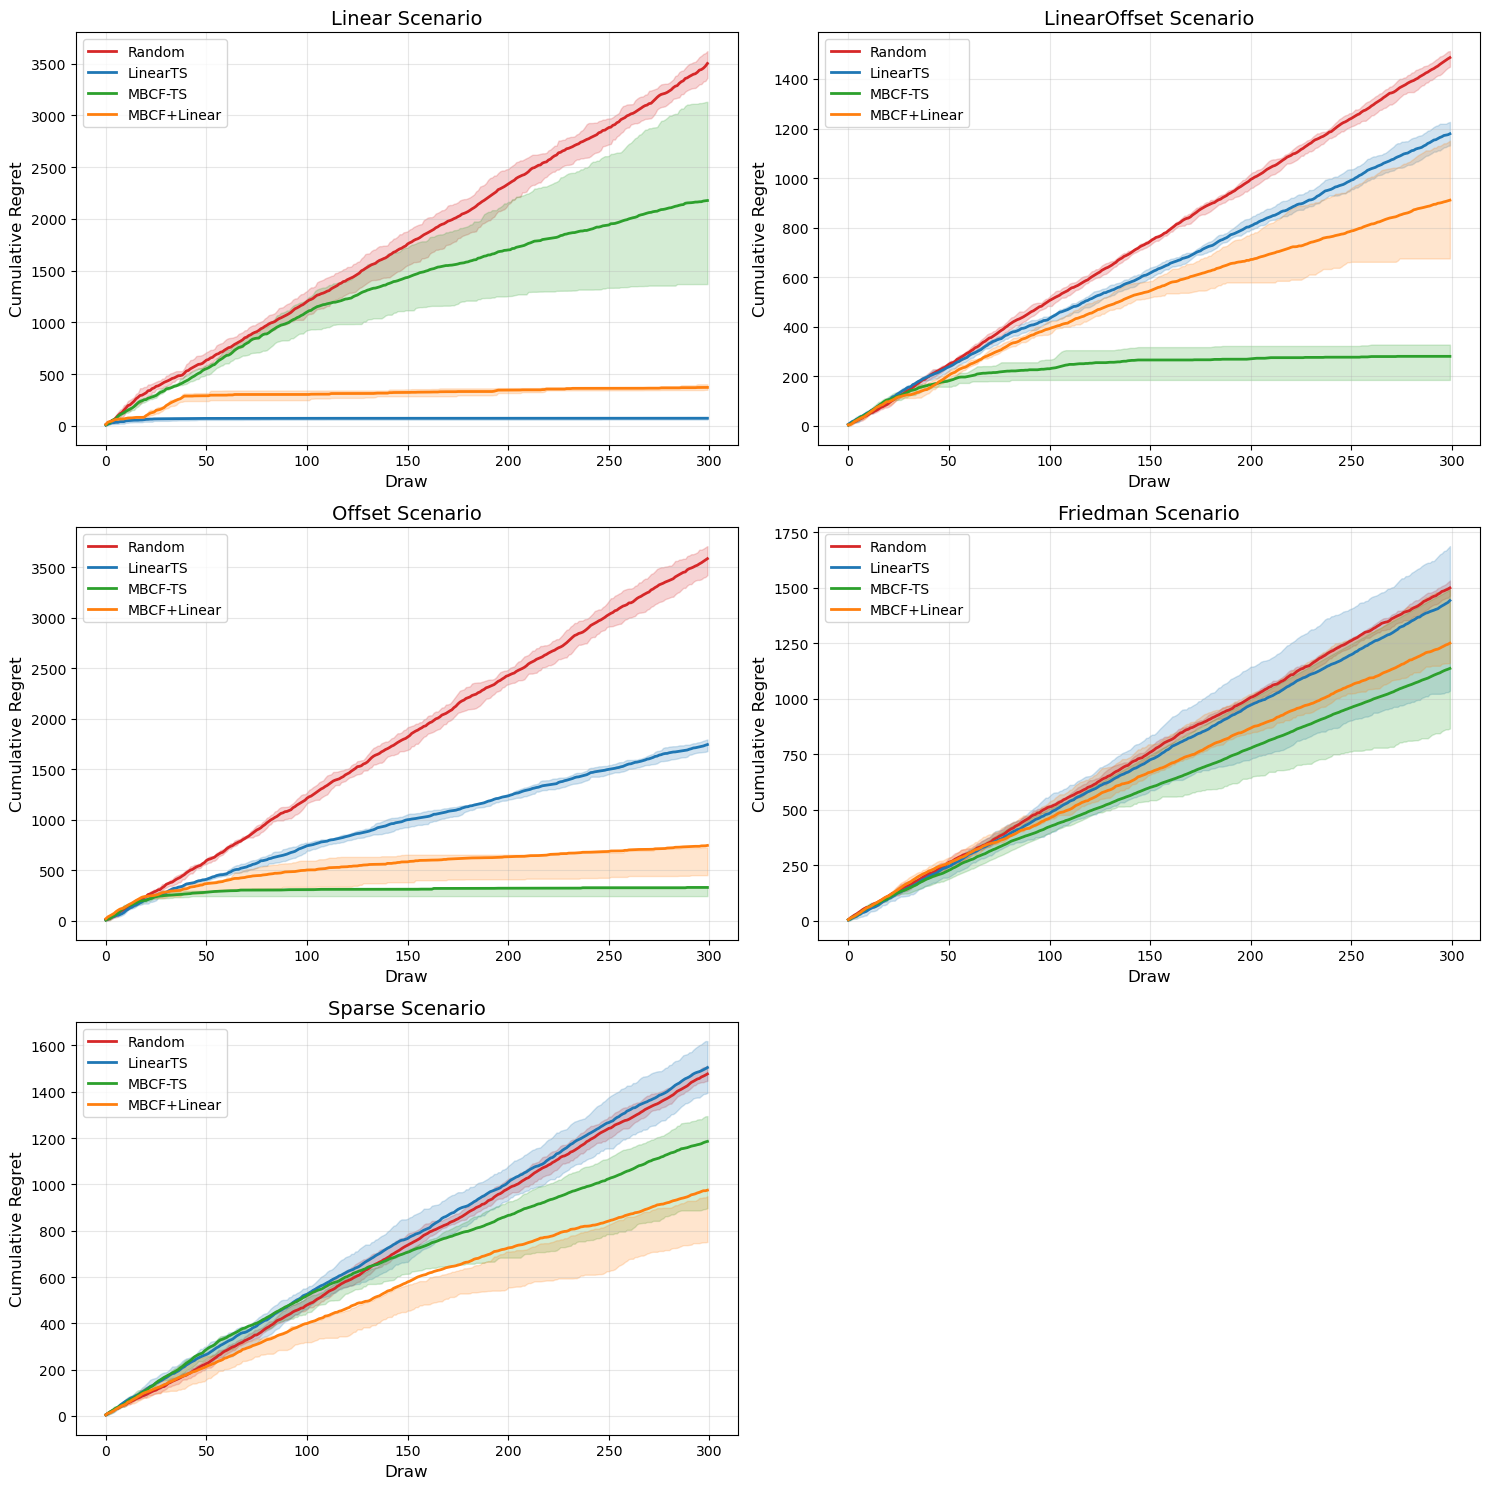

In [ ]:
# import pickle
# results_dir = "./results/agent_comparison5"
# result_filename = os.path.join(results_dir, f"result.pkl")
results, n_draws = pickle.load(file=open(result_filename, "rb"))

# Plot results and save to file
plot_comparison_results(
    results=results,
    n_draws=n_draws,
    save_path=f"{results_dir}/agent_comparison_results.png",
    show_time=False
)